### **MODEL BUILDING AND EVALUATION**

In [ ]:
# Importing required modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, RandomizedSearchCV, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

In [43]:
# Loading train data
train_data = pd.read_csv(r'C:\Users\spand\Projects\MICROSOFT_CYBERSECURITY\Guvi---Microsoft-Cybersecurity\Data\Processed\Train_DS_Cleaned.csv')
train_data

,OrgId,DetectorId,IncidentGrade,DeviceId,IpAddress,Url,AccountName,DeviceName,ApplicationName,Hour,...,Month,Year,Category,EntityType,IsImpacted,AlertTitle,IsWeekend,IsBusinessHour,IsMajorState,IsOSVersion66
0,26,31,BenignPositive,98799,360606,160396,453297,153085,3421,5,...,6,2024,7,2,0,11,0,0,1,1
1,33,38,BenignPositive,98799,360606,160396,453297,3142,3421,10,...,6,2024,5,4,1,11,0,1,1,1
2,201,419,BenignPositive,98799,360606,160396,453297,4181,3421,3,...,6,2024,3,4,1,11,0,0,1,1
3,204,44,TruePositive,98799,360606,160396,453297,153085,3421,16,...,6,2024,10,2,0,11,1,1,1,1
4,54,102,BenignPositive,98799,360606,160396,453297,153085,3421,2,...,6,2024,4,2,1,11,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4577395,142,112,FalsePositive,98799,360606,160396,453297,153085,3421,10,...,6,2024,4,5,1,11,0,1,1,1
4577396,36,2,FalsePositive,98799,360606,160396,36982,153085,3421,19,...,6,2024,0,10,1,2,0,0,1,1
4577397,851,1,BenignPositive,98799,360606,160396,453297,153085,3421,4,...,6,2024,6,5,0,1,1,0,1,1
4577398,12,16,BenignPositive,98799,546,160396,453297,153085,3421,23,...,5,2024,5,3,0,11,0,0,1,1


In [44]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
OrgId,4577400.0,173.088914,373.175960,0.0,9.0,42.0,161.0,6129.0
DetectorId,4577400.0,109.609950,425.205015,0.0,2.0,9.0,46.0,9522.0
DeviceId,4577400.0,95565.835028,16597.093200,0.0,98799.0,98799.0,98799.0,98799.0
IpAddress,4577400.0,282934.811780,143093.593241,0.0,360606.0,360606.0,360606.0,360606.0
Url,4577400.0,150618.664563,37110.491221,0.0,160396.0,160396.0,160396.0,160396.0
AccountName,4577400.0,358880.802810,173275.365765,0.0,453297.0,453297.0,453297.0,453297.0
DeviceName,4577400.0,142874.761923,36665.288239,0.0,153085.0,153085.0,153085.0,153085.0
ApplicationName,4577400.0,3339.761731,519.911393,0.0,3421.0,3421.0,3421.0,3421.0
Hour,4577400.0,12.153785,6.773679,0.0,6.0,13.0,18.0,23.0
Day,4577400.0,9.813268,6.229133,1.0,5.0,9.0,12.0,31.0


In [45]:
# # Sample 5% of the data for faster prototyping by using Stratified sampling to keep class ratios
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.95, random_state=42)
for train_index, _ in strat_split.split(train_data, train_data['IncidentGrade']):
    train_sample_df = train_data.iloc[train_index]

print("Original data shape:", train_data.shape)
print("Sample data shape:", train_sample_df.shape)
print(f"\n{train_sample_df['IncidentGrade'].value_counts(normalize=True) * 100}")  # should match original proportions

Original data shape: (4577400, 22)
Sample data shape: (228870, 22)

IncidentGrade
BenignPositive    43.123607
TruePositive      35.150085
FalsePositive     21.726308
Name: proportion, dtype: float64


In [46]:
# Feature Matrix & Target variable
y = train_sample_df['IncidentGrade']
X = train_sample_df.drop(columns=['IncidentGrade'], axis=1) 

In [47]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Encoding the target variable
le = LabelEncoder()
y_train = le.fit_transform(y_train) 
y_test = le.transform(y_test)

# Scale features that are in different ranges
scaler = StandardScaler()
columns_to_scale = ['Hour', 'Day', 'DayOfWeek', 'Month', 'Year', 'Category', 'EntityType', 'AlertTitle']
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160209, 21)
(68661, 21)
(160209,)
(68661,)


#### **Baseline Models**

In [49]:
def train_baseline_models(X_train, X_test, y_train, y_test):
    
    # Define baseline models 
    baseline_models = {
        'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
        'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42, max_depth=10),
        'Random Forest': RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42, n_estimators=100),
        'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5, weights='distance', metric='minkowski', n_jobs=-1),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
        'XGBoost': XGBClassifier(n_jobs=-1, random_state=42, n_estimators=100)
    }
    
    results = {}
    
    # Train and evaluate each model
    for model_name, model in baseline_models.items():
        print("-" * 55)
        print(f'Training Model: {model_name}')
        print("-" * 55)
            
        model.fit(X_train, y_train) # Fit the model
        y_pred = model.predict(X_test) # Predict
        
        accuracy = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        
        # Store results
        results[model_name] = {
            'model': model,
            'predictions': y_pred,
            'accuracy': accuracy,
            'confusion_matrix': cm,
            'classification_report': report
        }
        
        # Print results
        print(f'\nConfusion Matrix: \n{cm}')
        print(f'\nClassification Report:')
        print(classification_report(y_test, y_pred))
    
    return results

results = train_baseline_models(X_train, X_test, y_train, y_test)

-------------------------------------------------------
Training Model: Logistic Regression
-------------------------------------------------------

Confusion Matrix: 
[[15733  4293  9583]
 [ 5370  4357  5191]
 [ 8537  2588 13009]]

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.53      0.53     29609
           1       0.39      0.29      0.33     14918
           2       0.47      0.54      0.50     24134

    accuracy                           0.48     68661
   macro avg       0.46      0.45      0.46     68661
weighted avg       0.48      0.48      0.48     68661

-------------------------------------------------------
Training Model: Decision Tree
-------------------------------------------------------

Confusion Matrix: 
[[19001  8960  1648]
 [ 2410 12011   497]
 [ 4557  3731 15846]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.64      0.68     29609
    

In [50]:
def compare_results(results):
    comparison_data = []

    for model_name, result in results.items():
        report = result['classification_report']

        # For overall comparison
        comparison_data.append({
            'Model': model_name,
            'Accuracy': result['accuracy'],
            'Precision (Macro)': report['macro avg']['precision'],
            'Recall (Macro)': report['macro avg']['recall'],
            'F1-Score (Macro)': report['macro avg']['f1-score'],
            'F1-Score (Weighted)': report['weighted avg']['f1-score']
        })

    # Combined comparison DataFrame
    comparison_df = pd.DataFrame(comparison_data)
    comparison_df = comparison_df.round(4).sort_values(by='F1-Score (Macro)', ascending=False)
    
    print(comparison_df.to_string(index=False))

    # Best model
    best_model_idx = comparison_df['F1-Score (Macro)'].idxmax()
    best_model_name = comparison_df.loc[best_model_idx, 'Model']
    best_f1_score = comparison_df.loc[best_model_idx, 'F1-Score (Macro)']

    print(f"\nBest Model: {best_model_name}")
    print(f"Best F1-Score (Macro): {best_f1_score:.4f}")

    return comparison_df, best_model_name

In [58]:
# Compare results of baseline models
baseline_df, best_model_name = compare_results(results)

              Model  Accuracy  Precision (Macro)  Recall (Macro)  F1-Score (Macro)  F1-Score (Weighted)
            XGBoost    0.9037             0.9062          0.8903            0.8971               0.9032
      Random Forest    0.8890             0.8912          0.8753            0.8821               0.8885
K-Nearest Neighbors    0.7904             0.7810          0.7752            0.7779               0.7899
  Gradient Boosting    0.7874             0.8304          0.7450            0.7664               0.7820
      Decision Tree    0.6825             0.6996          0.7011            0.6808               0.6910
Logistic Regression    0.4821             0.4622          0.4542            0.4551               0.4776

Best Model: XGBoost
Best F1-Score (Macro): 0.8971


#### **Apply SMOTE to Baseline Models**

In [59]:
# Define top 3 baseline models 
top3_models = {
    'XGBoost': XGBClassifier(n_jobs=-1, random_state=42, n_estimators=100),
    'Random Forest': RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42, n_estimators=100),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5, weights='distance', metric='minkowski', n_jobs=-1)
}

In [60]:
# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(pd.Series(y_train).value_counts())
print(pd.Series(y_train_resampled).value_counts())

0    69088
2    56314
1    34807
Name: count, dtype: int64
0    69088
1    69088
2    69088
Name: count, dtype: int64


In [61]:
def train_top3_models_with_SMOTE(X_train_resampled, X_test, y_train_resampled, y_test):
    
    results = {}
    
    # Train and evaluate each model
    for model_name, model in top3_models.items():
        print("-" * 55)
        print(f'Training Model: {model_name} with SMOTE')
        print("-" * 55)
            
        model.fit(X_train_resampled, y_train_resampled) # Fit the model
        y_pred = model.predict(X_test) # Predict
        
        accuracy = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
            
        # Store results
        results[model_name] = {
            'model': model,
            'predictions': y_pred,
            'accuracy': accuracy,
            'confusion_matrix': cm,
            'classification_report': report
        }
            
        # Print results
        print(f'\nConfusion Matrix: \n{cm}')
        print(f'\nClassification Report:')
        print(classification_report(y_test, y_pred))
    
    return results

results = train_top3_models_with_SMOTE(X_train_resampled, X_test, y_train_resampled, y_test)

-------------------------------------------------------
Training Model: XGBoost with SMOTE
-------------------------------------------------------

Confusion Matrix: 
[[27635  1027   947]
 [ 1662 12607   649]
 [ 1765   926 21443]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     29609
           1       0.87      0.85      0.86     14918
           2       0.93      0.89      0.91     24134

    accuracy                           0.90     68661
   macro avg       0.90      0.89      0.89     68661
weighted avg       0.90      0.90      0.90     68661

-------------------------------------------------------
Training Model: Random Forest with SMOTE
-------------------------------------------------------

Confusion Matrix: 
[[27501   995  1113]
 [ 1829 12242   847]
 [ 2068   807 21259]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     

In [62]:
# Compare reults of top 3 models with SMOTE
SMOTE_df, best_model_name = compare_results(results)

              Model  Accuracy  Precision (Macro)  Recall (Macro)  F1-Score (Macro)  F1-Score (Weighted)
            XGBoost    0.8984             0.8954          0.8890            0.8918               0.8982
      Random Forest    0.8885             0.8877          0.8768            0.8816               0.8881
K-Nearest Neighbors    0.7830             0.7687          0.7789            0.7726               0.7846

Best Model: XGBoost
Best F1-Score (Macro): 0.8918


#### **Hyperparameter Tune Best Models**

In [64]:
top2_models = {
    'XGBoost': XGBClassifier(n_jobs=-1, random_state=42, n_estimators=100),
    'Random Forest': RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42, n_estimators=100)
}

# Common CV strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter spaces
param_distributions = {
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'scale_pos_weight': [1, 2, 3],
        'reg_alpha': [0, 0.01, 0.1, 1, 10, 100],
        'reg_lambda': [0.5, 0.7, 1, 1.3]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'max_features': ['sqrt', 'log2', None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }
}

def hp_tune_models(X_train_resampled, y_train_resampled, X_test, y_test):
    
    results = {}
    for model_name, model in top2_models.items():
        print("-" * 55)
        print(f"Hyperparameter Tuning {model_name} with SMOTE")
        print("-" * 55)
        
        search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_distributions[model_name],
            n_iter=20,
            scoring='f1_macro',
            cv=cv_strategy,
            n_jobs=-1,
            verbose=1,
            random_state=42
        )

        search.fit(X_train_resampled, y_train_resampled)
        best_model = search.best_estimator_
        y_pred = best_model.predict(X_test)

        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        results[model_name] = {
            'best_model': best_model,
            'best_params': search.best_params_,
            'accuracy': accuracy,
            'confusion_matrix': cm,
            'classification_report': report
        }

        print(f"Best Params: {search.best_params_}")
        print(f'\nConfusion Matrix: \n{cm}')
        print(f'\nClassification Report:')
        print(classification_report(y_test, y_pred))

    return results

results = hp_tune_models(X_train_resampled, y_train_resampled, X_test, y_test) 

-------------------------------------------------------
Hyperparameter Tuning XGBoost with SMOTE
-------------------------------------------------------
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'subsample': 0.8, 'scale_pos_weight': 3, 'reg_lambda': 0.7, 'reg_alpha': 0.01, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 1.0}

Confusion Matrix: 
[[28041   778   790]
 [ 1157 13091   670]
 [ 1188   735 22211]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     29609
           1       0.90      0.88      0.89     14918
           2       0.94      0.92      0.93     24134

    accuracy                           0.92     68661
   macro avg       0.92      0.91      0.92     68661
weighted avg       0.92      0.92      0.92     68661

-------------------------------------------------------
Hyperparameter Tuning Random Forest with SMOTE
---------------

In [65]:
# Compare reults of top 2 HP tuned models with SMOTE
hpt_SMOTE_df, best_model_name = compare_results(results)

        Model  Accuracy  Precision (Macro)  Recall (Macro)  F1-Score (Macro)  F1-Score (Weighted)
Random Forest    0.9423             0.9365          0.9387            0.9376               0.9423
      XGBoost    0.9225             0.9192          0.9150            0.9170               0.9224

Best Model: Random Forest
Best F1-Score (Macro): 0.9376


In [67]:
baseline_rf = baseline_df[1:2].copy()
baseline_rf.loc[:, 'Model'] = 'Baseline RF'

smote_rf = SMOTE_df[1:2].copy()
smote_rf.loc[:, 'Model'] = 'Baseline RF + SMOTE'

tuned_rf = hpt_SMOTE_df[0:1].copy()
tuned_rf.loc[:, 'Model'] = 'SMOTE + HP Tuned RF'

rf_comparison_df = pd.concat([baseline_rf, smote_rf, tuned_rf], ignore_index=True)
best_idx = rf_comparison_df['F1-Score (Macro)'].idxmax()
best_model = rf_comparison_df.loc[best_idx, 'Model']
best_f1 = rf_comparison_df.loc[best_idx, 'F1-Score (Macro)']

print(rf_comparison_df.to_string(index=False))
print(f"\nBest Model: {best_model}")
print(f"Best F1-Score (Macro): {best_f1:.4f}")

              Model  Accuracy  Precision (Macro)  Recall (Macro)  F1-Score (Macro)  F1-Score (Weighted)
        Baseline RF    0.8890             0.8912          0.8753            0.8821               0.8885
Baseline RF + SMOTE    0.8885             0.8877          0.8768            0.8816               0.8881
SMOTE + HP Tuned RF    0.9423             0.9365          0.9387            0.9376               0.9423

Best Model: SMOTE + HP Tuned RF
Best F1-Score (Macro): 0.9376


#### **Error Analysis of Best Model**

Total misclassifications: 3965


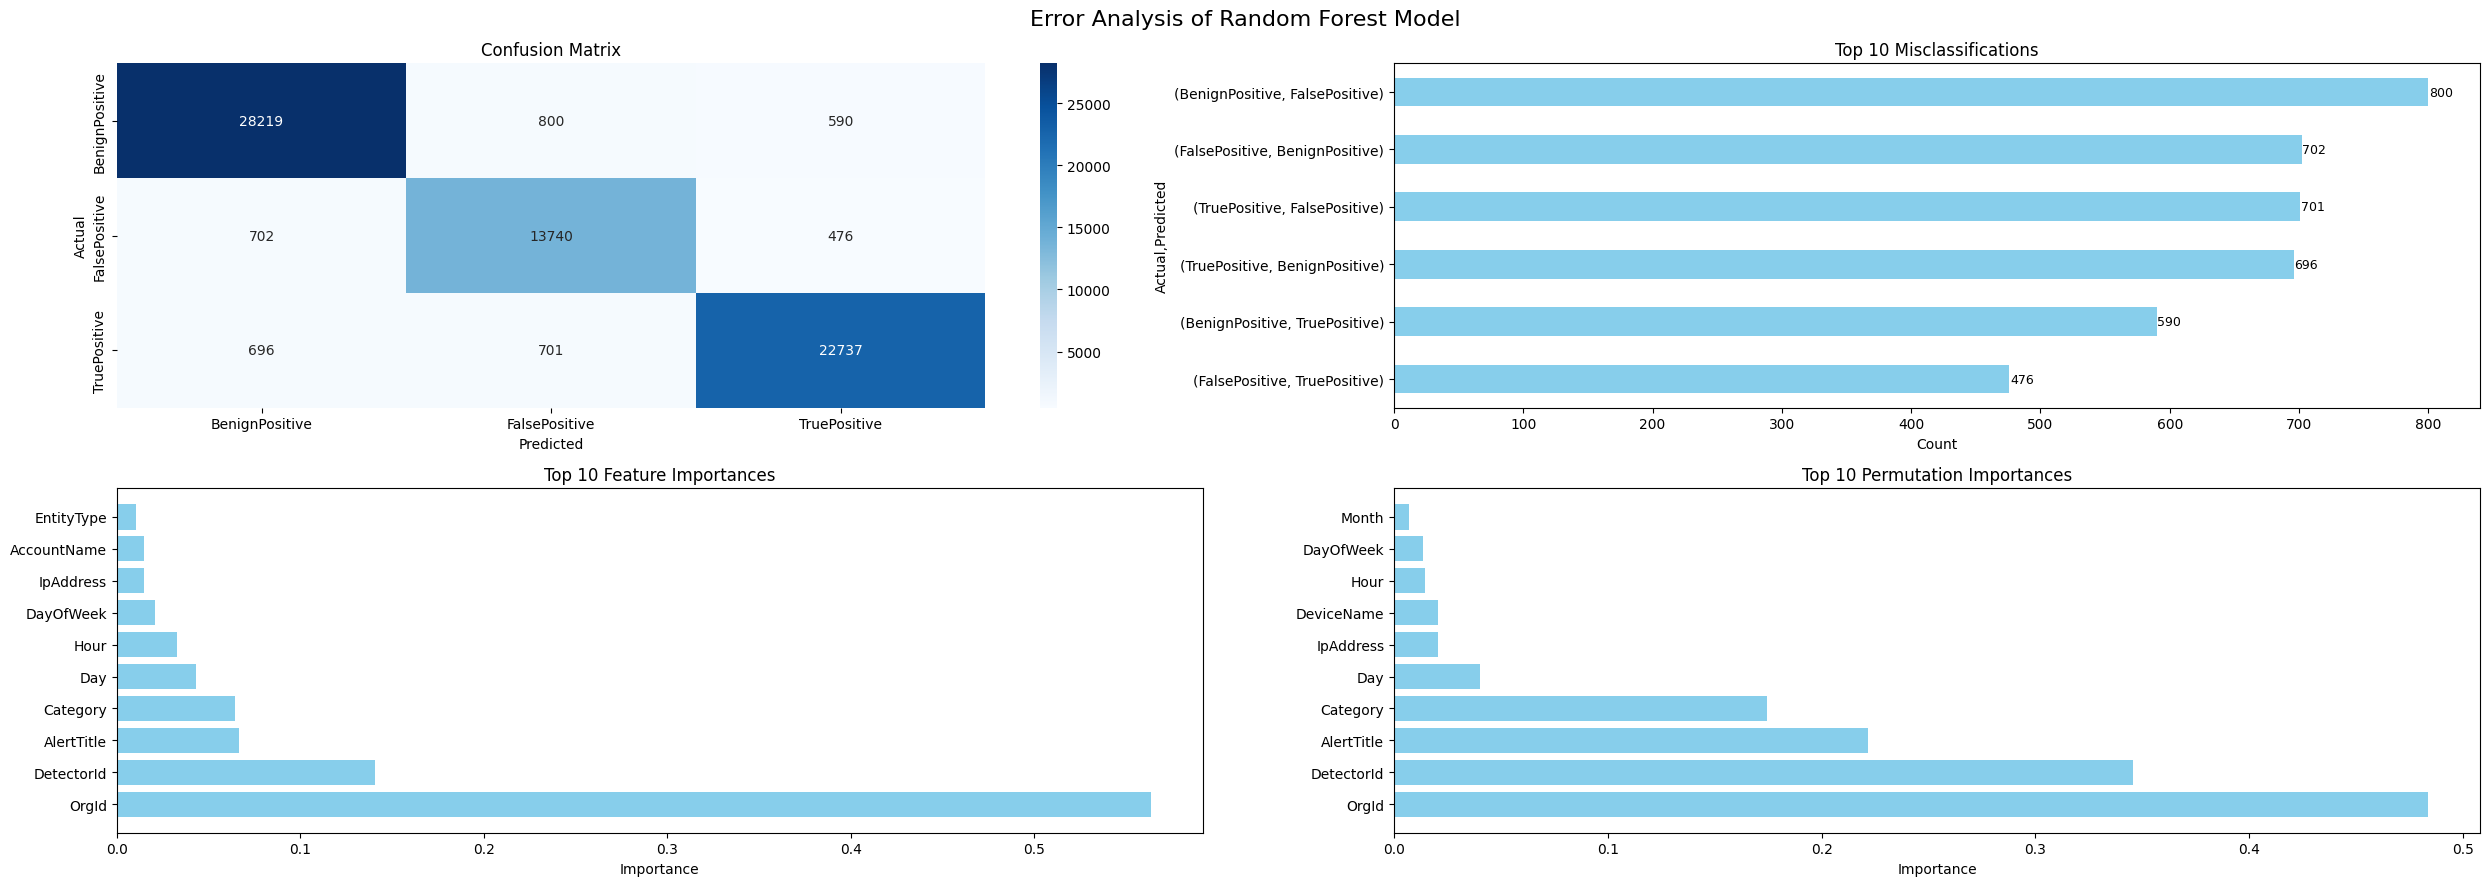

In [68]:
# Error Analysis of Random Forest Model
feature_names = X_train_resampled.columns if hasattr(X_train_resampled, 'columns') else [f'feature_{i}' for i in range(X_train_resampled.shape[1])]

# Decode labels back to string
label_mapping = dict(zip(range(len(le.classes_)), le.classes_))
y_test_str = [label_mapping[i] for i in y_test]
y_pred = results['Random Forest']['best_model'].predict(X_test)
y_pred_str = [label_mapping[i] for i in y_pred]

# Error Analysis DataFrame
error_df = pd.DataFrame({'Actual': y_test_str, 'Predicted': y_pred_str})
misclassified = error_df[error_df['Actual'] != error_df['Predicted']]
print(f"Total misclassifications: {len(misclassified)}")

fig, axes = plt.subplots(2, 2, figsize=(25, 9))
plt.suptitle("Error Analysis of Random Forest Model", fontsize=16)

ax_cm = axes[0][0]
ax_mis = axes[0][1]
ax_feat = axes[1][0]
ax_perm = axes[1][1]

# 1. Confusion Matrix
cm = confusion_matrix(y_test_str, y_pred_str, labels=le.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_, ax=ax_cm)
ax_cm.set_title("Confusion Matrix")
ax_cm.set_xlabel("Predicted")
ax_cm.set_ylabel("Actual")

# 2. Misclassification Breakdown
mis_count = misclassified.groupby(['Actual', 'Predicted']).size().sort_values(ascending=False).head(10)
mis_count.plot(kind='barh', ax=ax_mis, color='skyblue')

for i, v in enumerate(mis_count.values):
    ax_mis.text(v + 0.5, i, str(v), va='center', fontsize=9)

ax_mis.set_title("Top 10 Misclassifications")
ax_mis.set_xlabel("Count")
ax_mis.invert_yaxis()

# 3. Feature Importances 
model = results['Random Forest']['best_model']
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]
top_features = [feature_names[i] for i in indices]
top_importances = importances[indices]

ax_feat.barh(range(10), top_importances, color='skyblue')
ax_feat.set_yticks(range(10))
ax_feat.set_yticklabels(top_features)
ax_feat.set_title("Top 10 Feature Importances")
ax_feat.set_xlabel("Importance")
ax_feat.invert_yaxis()

# 4. Permutation Importances
perm = permutation_importance(model, X_test, y_test, n_repeats=10, scoring='f1_macro', random_state=42, n_jobs=-1)
sorted_idx = perm.importances_mean.argsort()[-10:]

ax_perm.barh(np.array(feature_names)[sorted_idx], perm.importances_mean[sorted_idx], color='skyblue')
ax_perm.set_title("Top 10 Permutation Importances")
ax_perm.set_xlabel("Importance")
ax_perm.invert_yaxis()

plt.tight_layout() 
plt.savefig(r"C:\Users\spand\Projects\MICROSOFT_CYBERSECURITY\Guvi---Microsoft-Cybersecurity\Plots/Error_analysis_RF.png", dpi=300, bbox_inches='tight') 
plt.show()